In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


## second derivative

Discrete evaluation with FFT.

In [23]:
def fft_derivative(y):
    N = len(y)
    freq = np.fft.fftfreq(N)*N
    yf = np.fft.fft(y)
    yfd = (1j*freq)*yf
    yd = np.fft.ifft(yfd)
    return yd

## tests

/home/amir/miniconda3/envs/jub/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


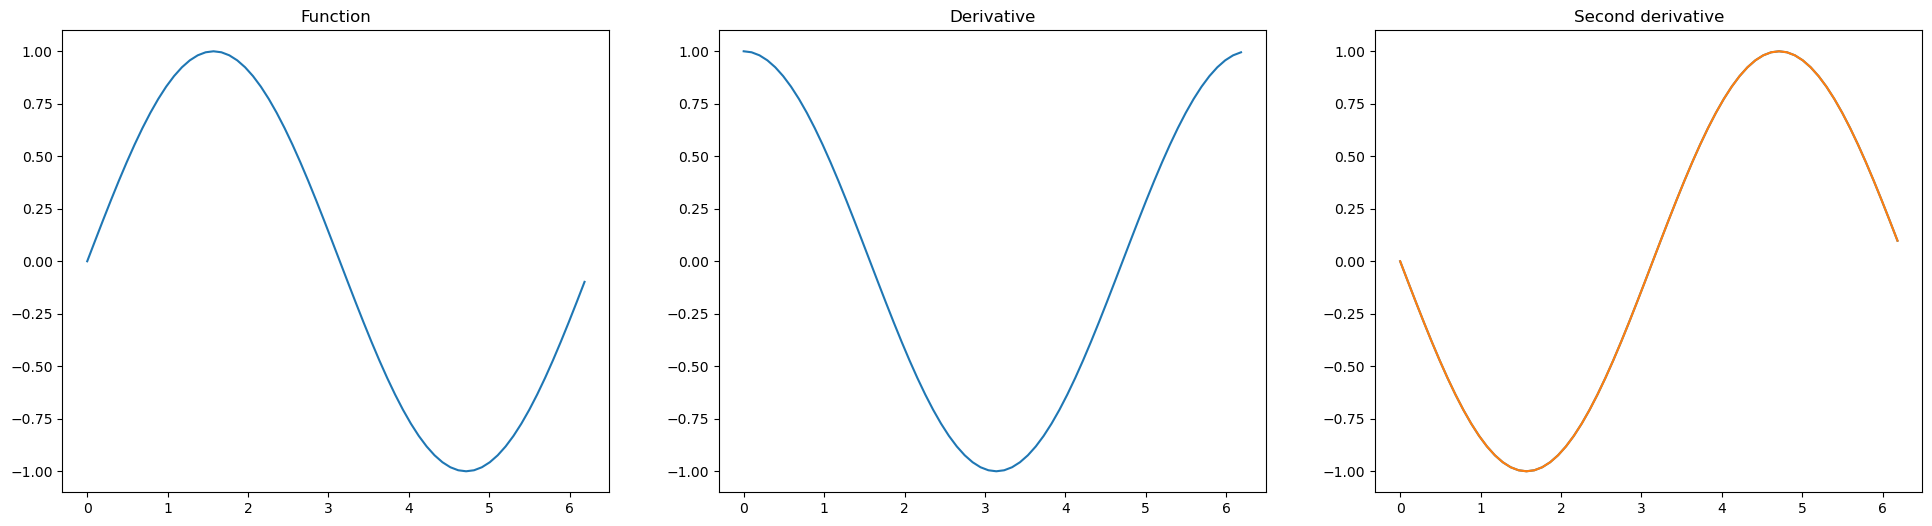

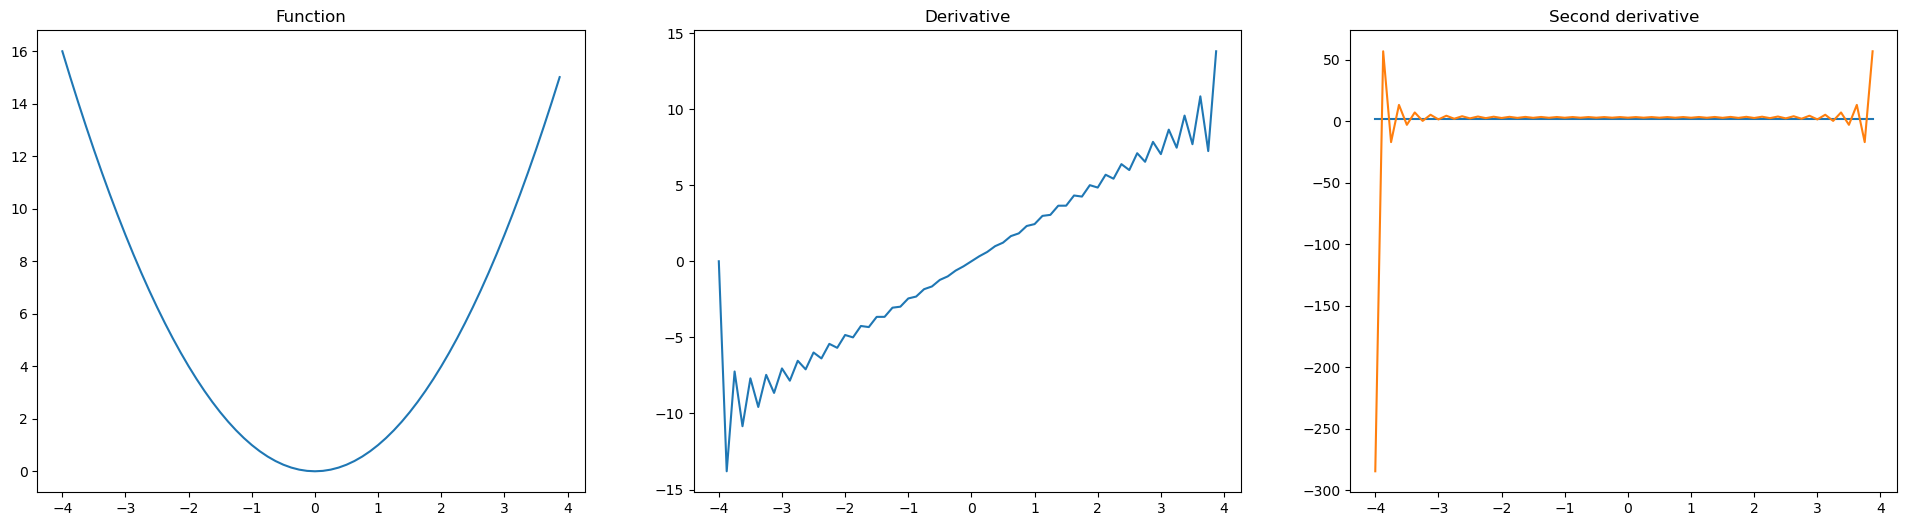

/tmp/ipykernel_5214/358740182.py:14: RuntimeWarning: divide by zero encountered in power
  return -1/4*np.power(np.abs(x), -3/2)


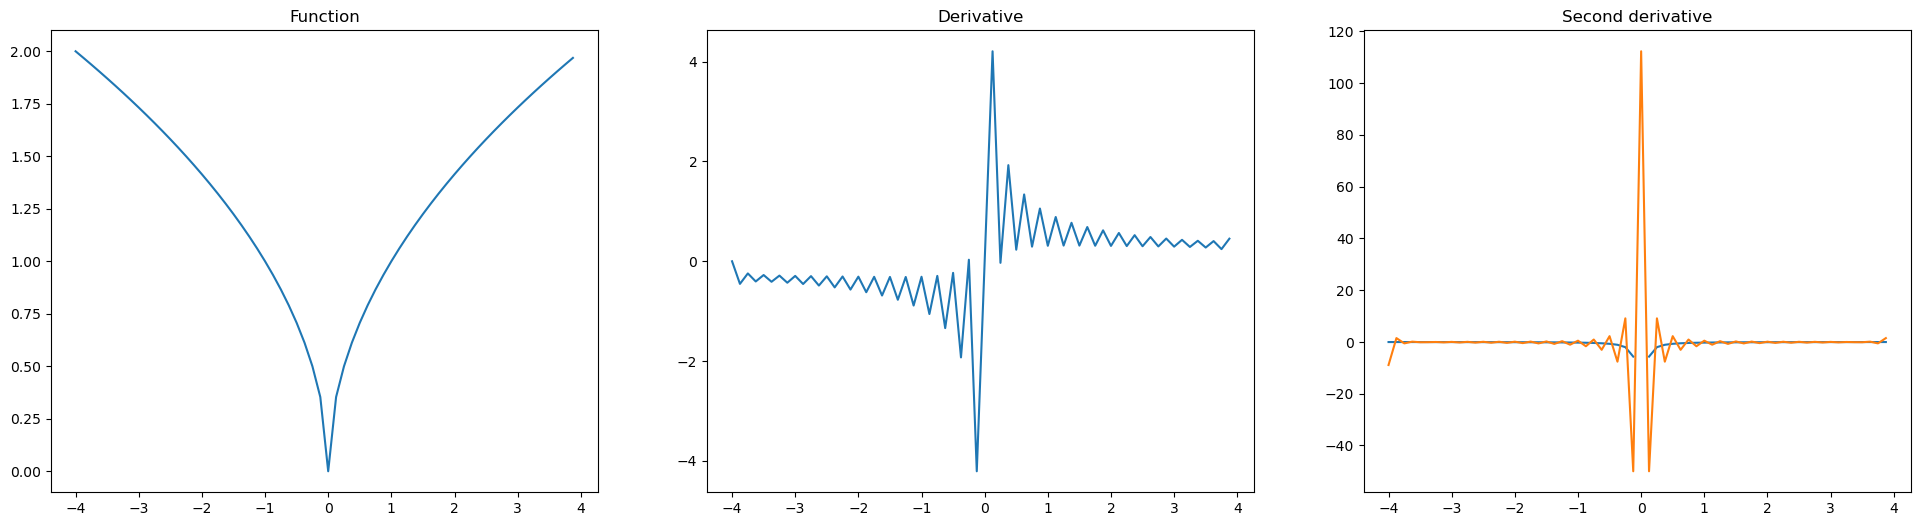

In [24]:
def f1(x):
    return np.sin(x)
def f1d2(x):
    return -1*np.sin(x)

def f2(x):
    return x**2
def f2d2(x):
    return np.ones_like(x)*2

def f3(x):
    return np.sqrt(np.abs(x))
def f3d2(x):
    return -1/4*np.power(np.abs(x), -3/2)

N = 64
for x, f, f2d in [(np.linspace(0, 2*np.pi, N, endpoint=False), f1, f1d2), (np.linspace(-4, 4, N, endpoint=False), f2, f2d2), (np.linspace(-4, 4, N, endpoint=False), f3, f3d2)]:
    y = f(x)
    plt.figure(figsize=(24, 6))
    plt.subplot(1, 3, 1)
    plt.title("Function")
    plt.plot(x, y)
    
    plt.subplot(1, 3, 2)
    plt.title("Derivative")
    yd_ft = fft_derivative(y)
    plt.plot(x, yd_ft)
    
    plt.subplot(1, 3, 3)
    plt.title("Second derivative")
    y2d = f2d(x)
    y2d_ft = fft_derivative(yd_ft)
    plt.plot(x, y2d)
    plt.plot(x, y2d_ft)
    
    plt.show()

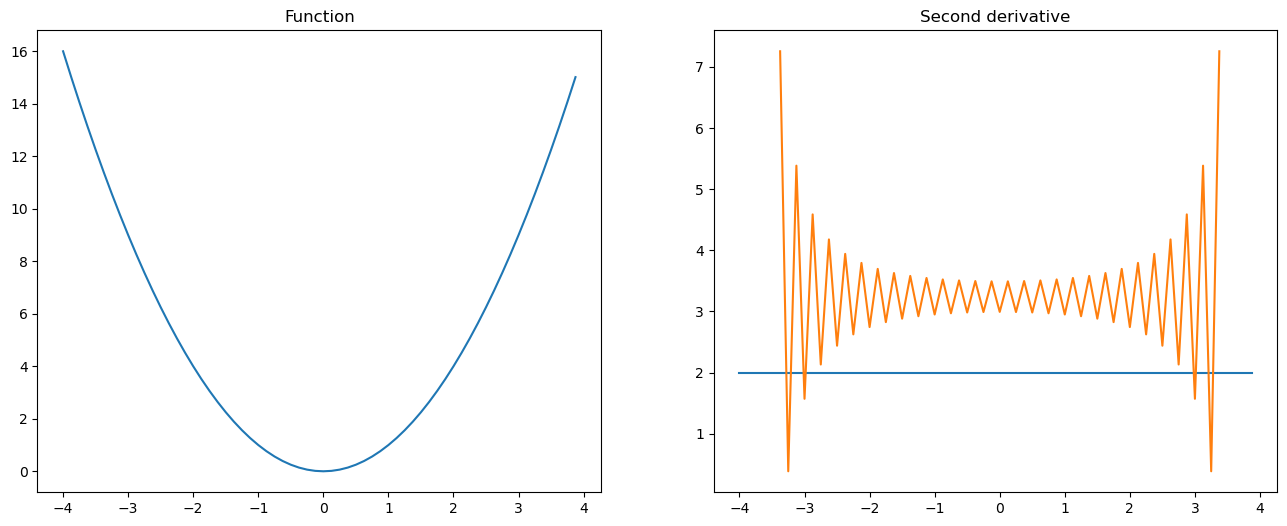

In [25]:

N = 64
for x, f, f2d in [(np.linspace(-4, 4, N, endpoint=False), f2, f2d2)]:
    y = f(x)
    y2d = f2d(x)
    y2d_ft = fft_derivative(fft_derivative(y))
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    plt.title("Function")
    plt.plot(x, y)
    
    plt.subplot(1, 2, 2)
    plt.title("Second derivative")
    plt.plot(x, y2d)
    filt = (y2d_ft < 10) & (y2d_ft > 0)
    plt.plot(x[filt], y2d_ft[filt])
    
    plt.show()

As we can see, fft derivative works pretty bed for non-smooth functions with sharp peaks.

## Plot shifting

In [34]:
def fft_shift(y, dx):
    N = len(y)
    k = np.exp(-np.fft.fftfreq(N)*np.pi*2*1j*dx)
    yf = np.fft.fft(y)
    yfsh = k*yf
    ysh = np.fft.ifft(yfsh)
    return ysh

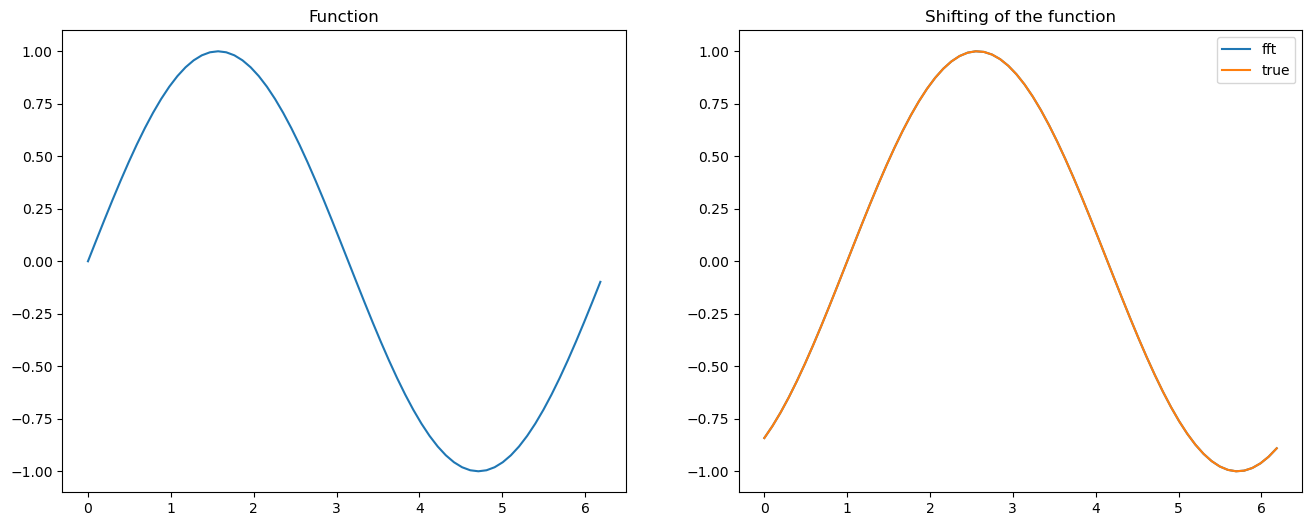

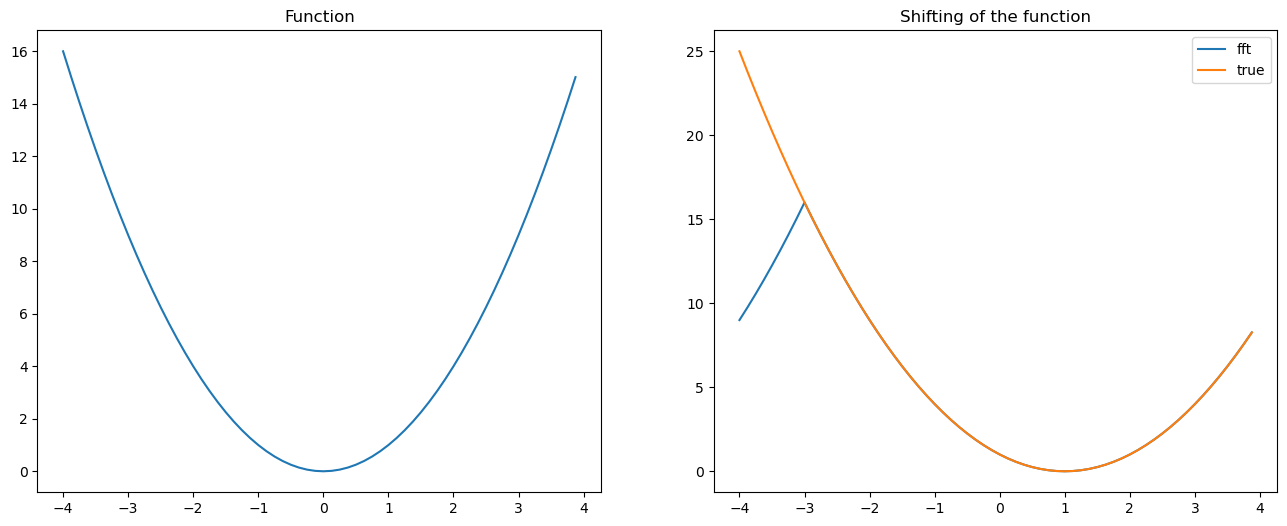

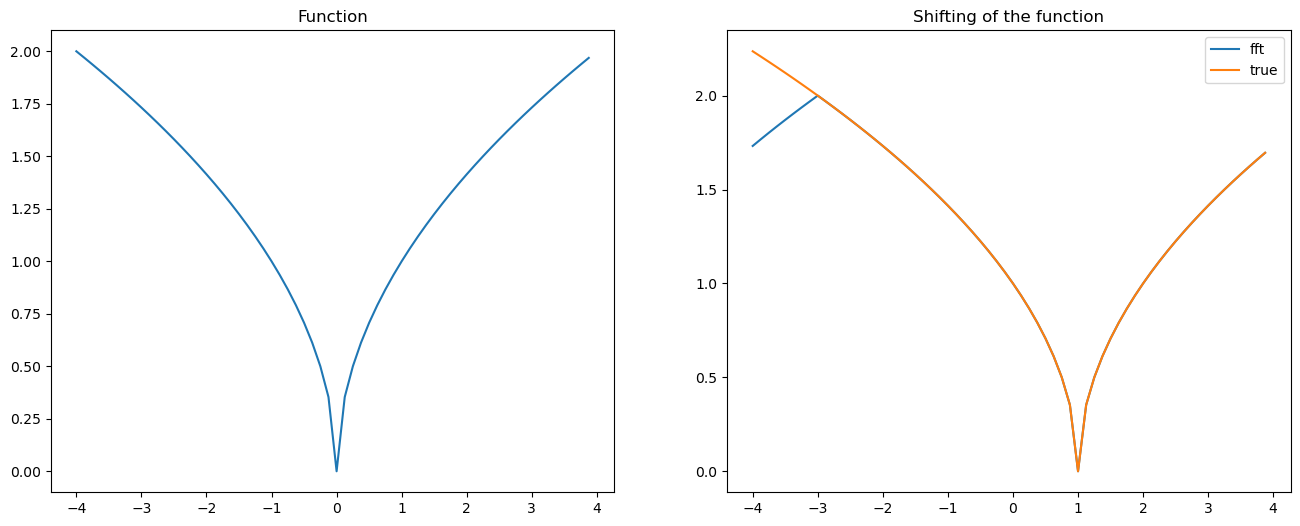

In [45]:
N = 64
dx = 1 # length of the shift
for x, f, f2d in [(np.linspace(0, 2*np.pi, N, endpoint=False), f1, f1d2), (np.linspace(-4, 4, N, endpoint=False), f2, f2d2), (np.linspace(-4, 4, N, endpoint=False), f3, f3d2)]:
    y = f(x)
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    plt.title("Function")
    plt.plot(x, y)
    
    plt.subplot(1, 2, 2)
    plt.title("Shifting of the function")
    y_sh_fft = fft_shift(y, dx/(x[1]-x[0]))
    plt.plot(x, y_sh_fft, label="fft")
    
    y_sh = f(x-dx)
    plt.plot(x, y_sh, label='true')
    plt.legend()
    
    plt.show()

The shift of the function can be computed quite good, assuming function is periodic.